<a href="https://colab.research.google.com/github/WattEfird4/StandardBank_Internship_Project/blob/main/StandardBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Standard Bank's Virtual Internship Project

**About**

CompanyDream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

**Problem**

The company wants to automate the loan eligibility process (real-time) based on customer details provided when filling out an online loan application forms. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.

Steps to Follow:

Problem Statement
Hypothesis Generation
Getting the system ready and loading the data
Understanding the data
EDA
Perform Univariate Analysis
Perform Bivariate Analysis
Missing value and outlier treatment
Evaluation Metrics for classification problem
Model building: part 1 (Apply ML classification algorithms)
Feature engineering
Model building: part 2 (Apply ML classification algorithms)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

In [15]:
df = pd.read_csv("/content/drive/MyDrive/Projects/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Projects/test.csv")

In [16]:
df.shape

(614, 13)

In [17]:
df_test.shape

(367, 12)

In [18]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.000,360.000,1.000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.000,360.000,1.000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.000,360.000,1.000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.000,360.000,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.000,360.000,1.000,Urban


In [19]:
data = df.copy()

In [20]:
data_test = df_test.copy()

In [21]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,NaN,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,Y


In [22]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.000,71.000,360.000,1.000,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.000,40.000,180.000,1.000,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.000,253.000,360.000,1.000,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.000,187.000,360.000,1.000,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.000,133.000,360.000,0.000,Semiurban,N


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
data.duplicated().sum()

0

In [25]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Loan_ID             0.000
Gender              2.120
Married             0.490
Dependents          2.440
Education           0.000
Self_Employed       5.210
ApplicantIncome     0.000
CoapplicantIncome   0.000
LoanAmount          3.580
Loan_Amount_Term    2.280
Credit_History      8.140
Property_Area       0.000
Loan_Status         0.000
dtype: float64

In [26]:
round(data_test.isnull().sum() / data_test.isnull().sum() * 100, 2)

Loan_ID                 NaN
Gender              100.000
Married                 NaN
Dependents          100.000
Education               NaN
Self_Employed       100.000
ApplicantIncome         NaN
CoapplicantIncome       NaN
LoanAmount          100.000
Loan_Amount_Term    100.000
Credit_History      100.000
Property_Area           NaN
dtype: float64

Missing values in both the test and training data

In [27]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.000,NaN,NaN,NaN,5403.459,6109.042,150.000,2877.500,3812.500,5795.000,81000.000
CoapplicantIncome,614.000,NaN,NaN,NaN,1621.246,2926.248,0.000,0.000,1188.500,2297.250,41667.000
LoanAmount,592.000,NaN,NaN,NaN,146.412,85.587,9.000,100.000,128.000,168.000,700.000
Loan_Amount_Term,600.000,NaN,NaN,NaN,342.000,65.120,12.000,360.000,360.000,360.000,480.000


In [28]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="dodgerblue"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Set1"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="red"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="viridis",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [30]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [31]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="purple",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="Set3")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Set3",
    )

    plt.tight_layout()
    plt.show()

In [32]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

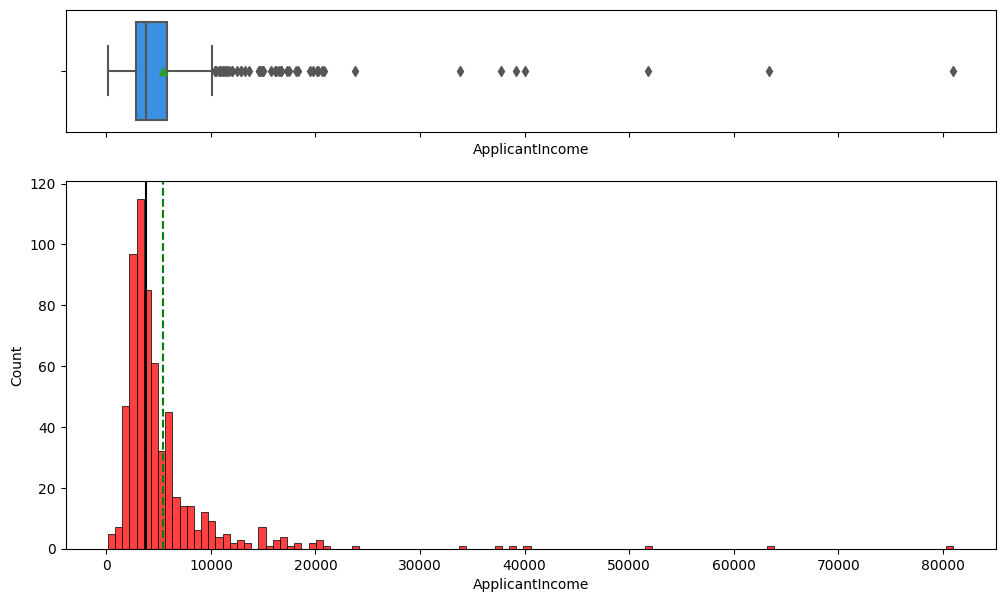

In [33]:
histogram_boxplot(data, "ApplicantIncome")

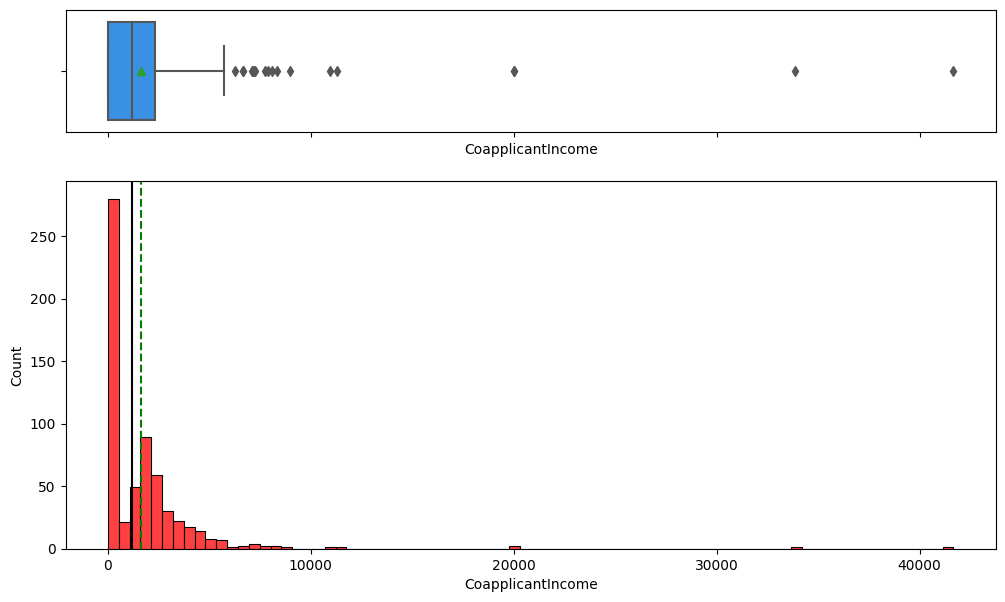

In [34]:
histogram_boxplot(data, "CoapplicantIncome")

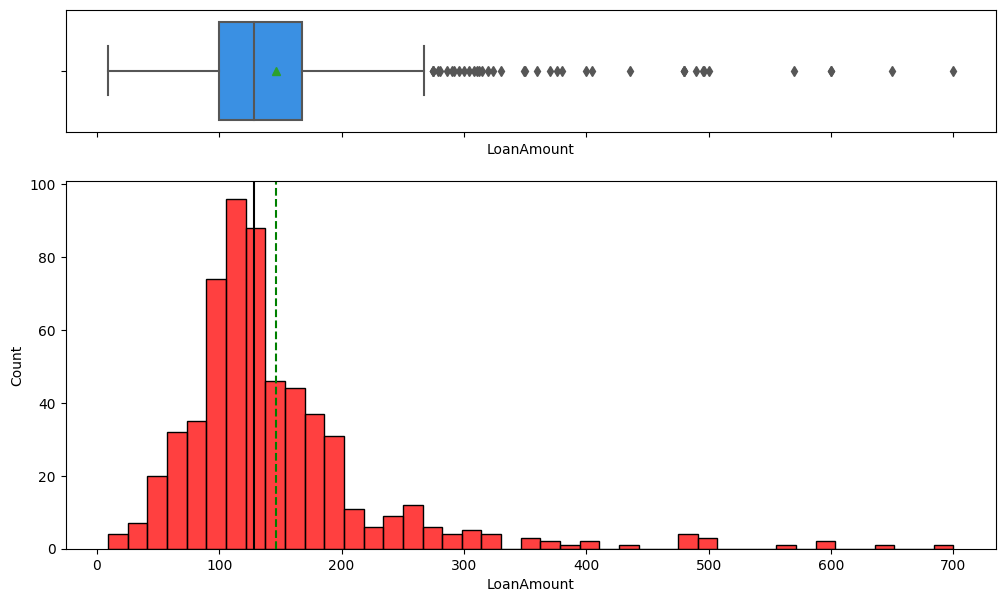

In [35]:
histogram_boxplot(data, "LoanAmount")

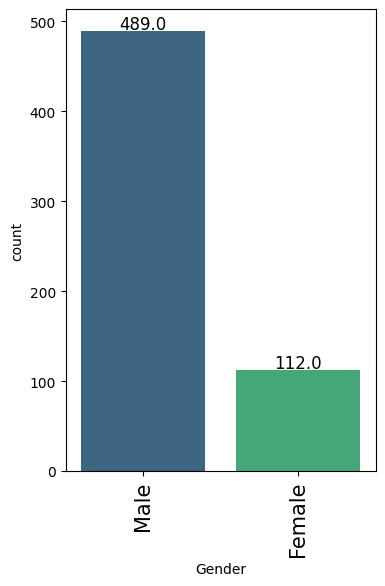

In [36]:
labeled_barplot(data, "Gender")

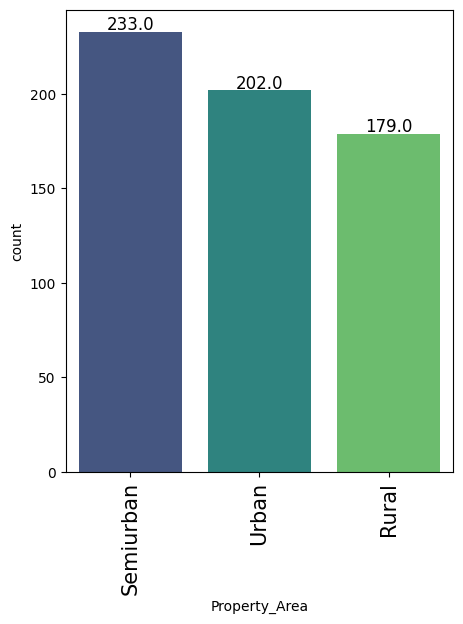

In [37]:
labeled_barplot(data, "Property_Area")

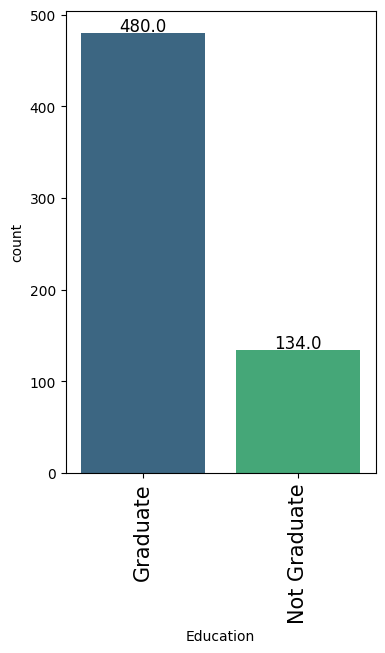

In [38]:
labeled_barplot(data, "Education")

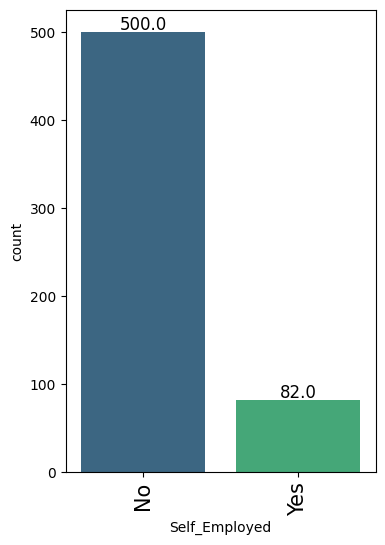

In [39]:
labeled_barplot(data, "Self_Employed")

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

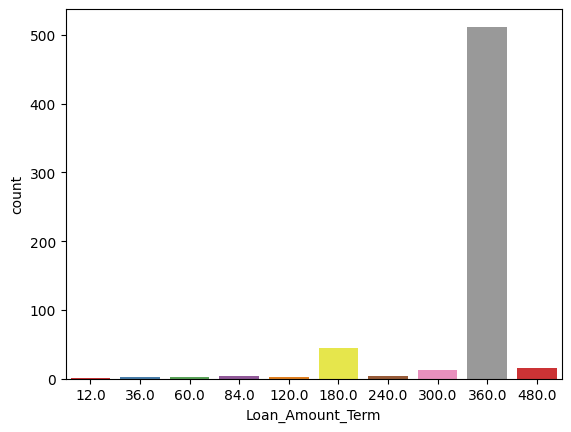

In [40]:
#@title
sns.countplot(data=data, x="Loan_Amount_Term", palette="Set1")

<Axes: xlabel='Credit_History', ylabel='count'>

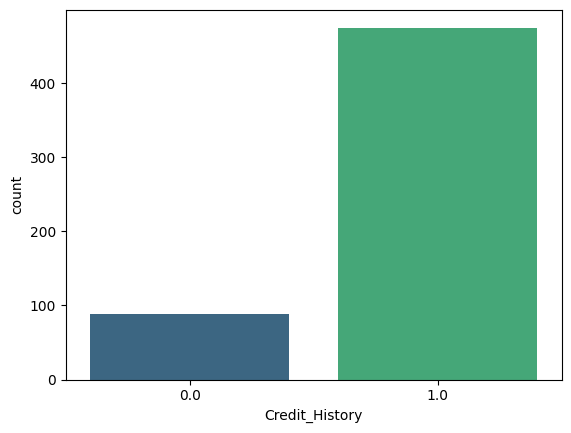

In [41]:
sns.countplot(data=data, x="Credit_History", palette="viridis")

<Axes: xlabel='Loan_Status', ylabel='count'>

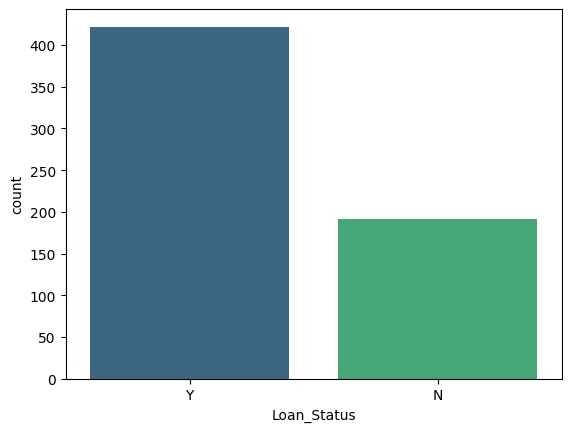

In [42]:
sns.countplot(data=data, x="Loan_Status", palette="viridis")

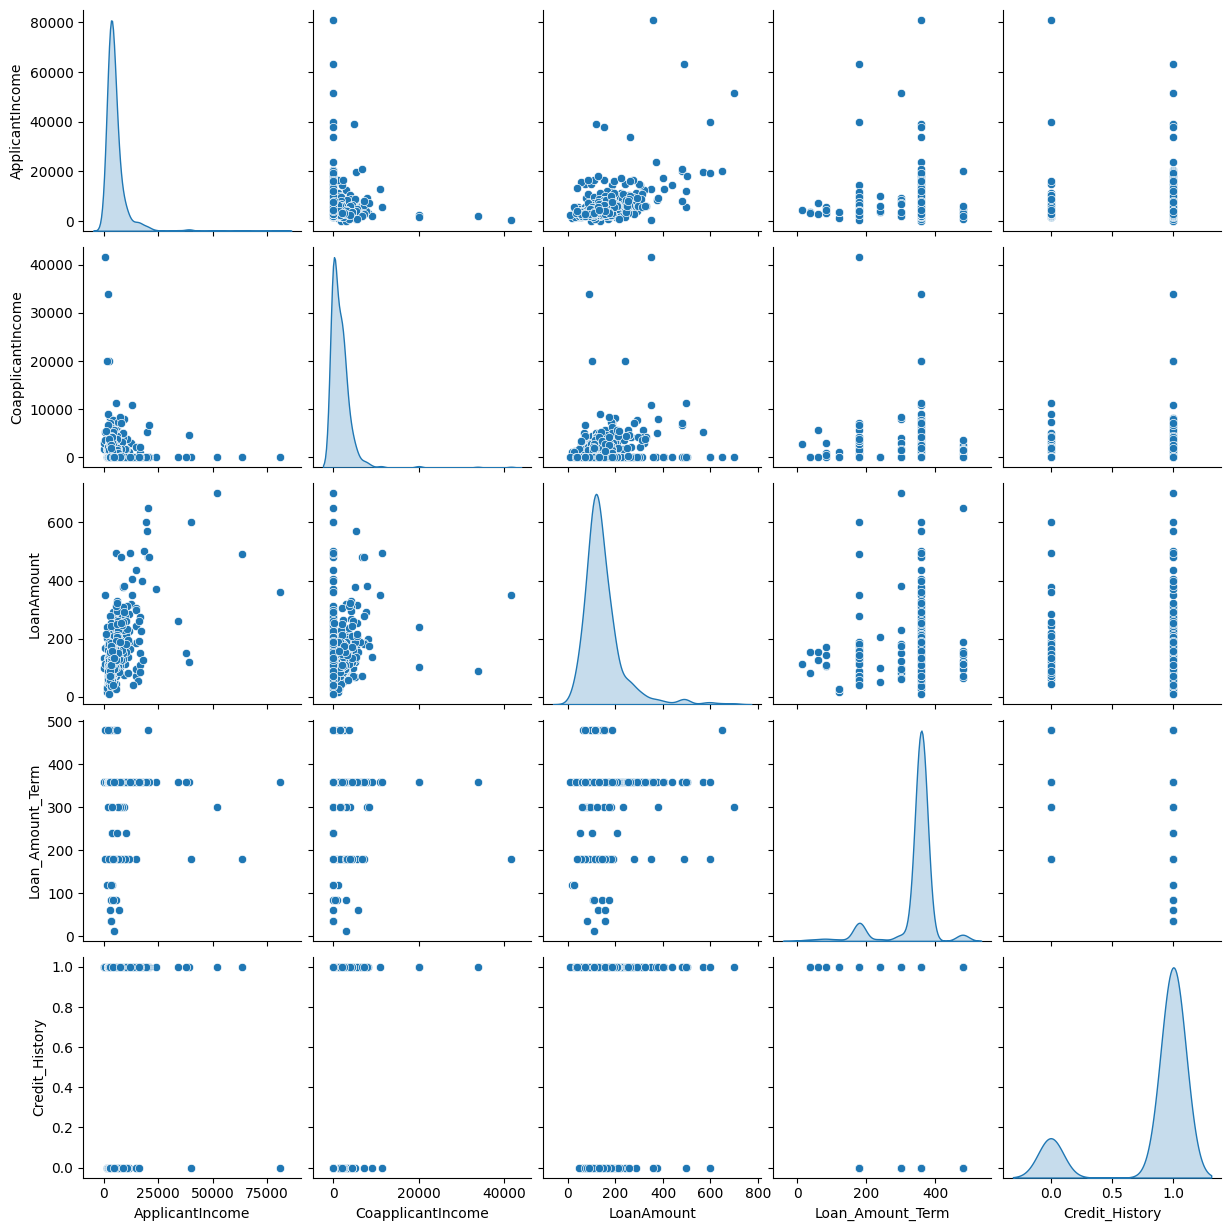

In [43]:
sns.pairplot(data=data, diag_kind="kde")

Gender       Female  Male  All
Loan_Status                   
All             112   489  601
Y                75   339  414
N                37   150  187
------------------------------------------------------------------------------------------------------------------------


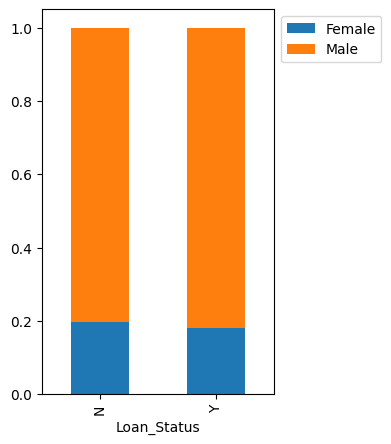

In [44]:
stacked_barplot(data, "Loan_Status", "Gender")

Loan_Status      N    Y  All
Property_Area               
All            192  422  614
Rural           69  110  179
Urban           69  133  202
Semiurban       54  179  233
------------------------------------------------------------------------------------------------------------------------


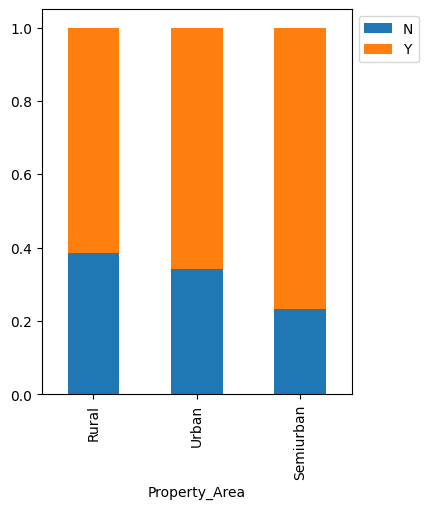

In [45]:
stacked_barplot(data, "Property_Area", "Loan_Status")

Loan_Status    N    Y  All
Dependents                
All          186  413  599
0            107  238  345
1             36   66  102
2             25   76  101
3+            18   33   51
------------------------------------------------------------------------------------------------------------------------


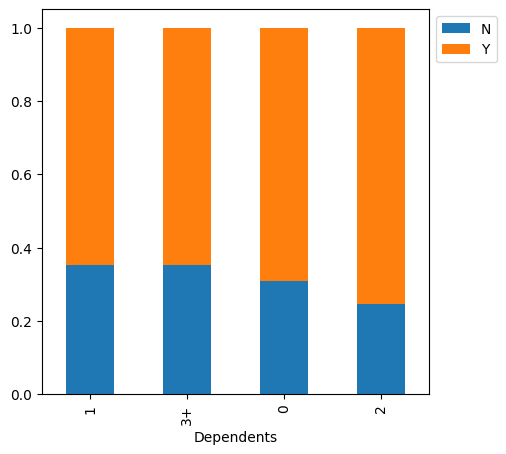

In [46]:
stacked_barplot(data, "Dependents", "Loan_Status")

Loan_Status    N    Y  All
Married                   
All          192  419  611
Yes          113  285  398
No            79  134  213
------------------------------------------------------------------------------------------------------------------------


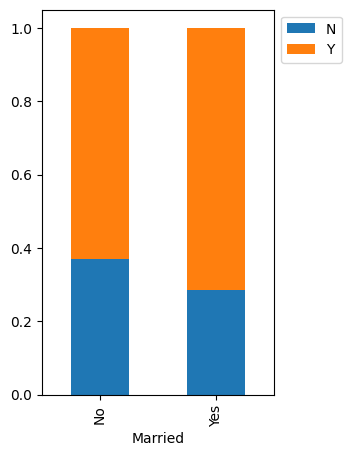

In [47]:
stacked_barplot(data, "Married", "Loan_Status")

Education    Graduate  Not Graduate  All
Loan_Status                             
All               480           134  614
Y                 340            82  422
N                 140            52  192
------------------------------------------------------------------------------------------------------------------------


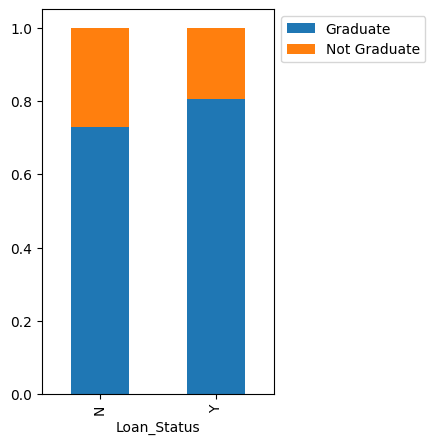

In [48]:
stacked_barplot(data, "Loan_Status", "Education")

Loan_Status      N    Y  All
Self_Employed               
All            183  399  582
No             157  343  500
Yes             26   56   82
------------------------------------------------------------------------------------------------------------------------


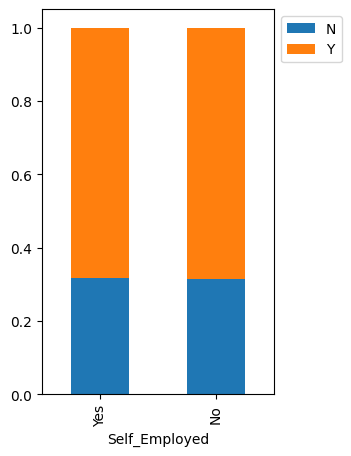

In [49]:
stacked_barplot(data, "Self_Employed", "Loan_Status")

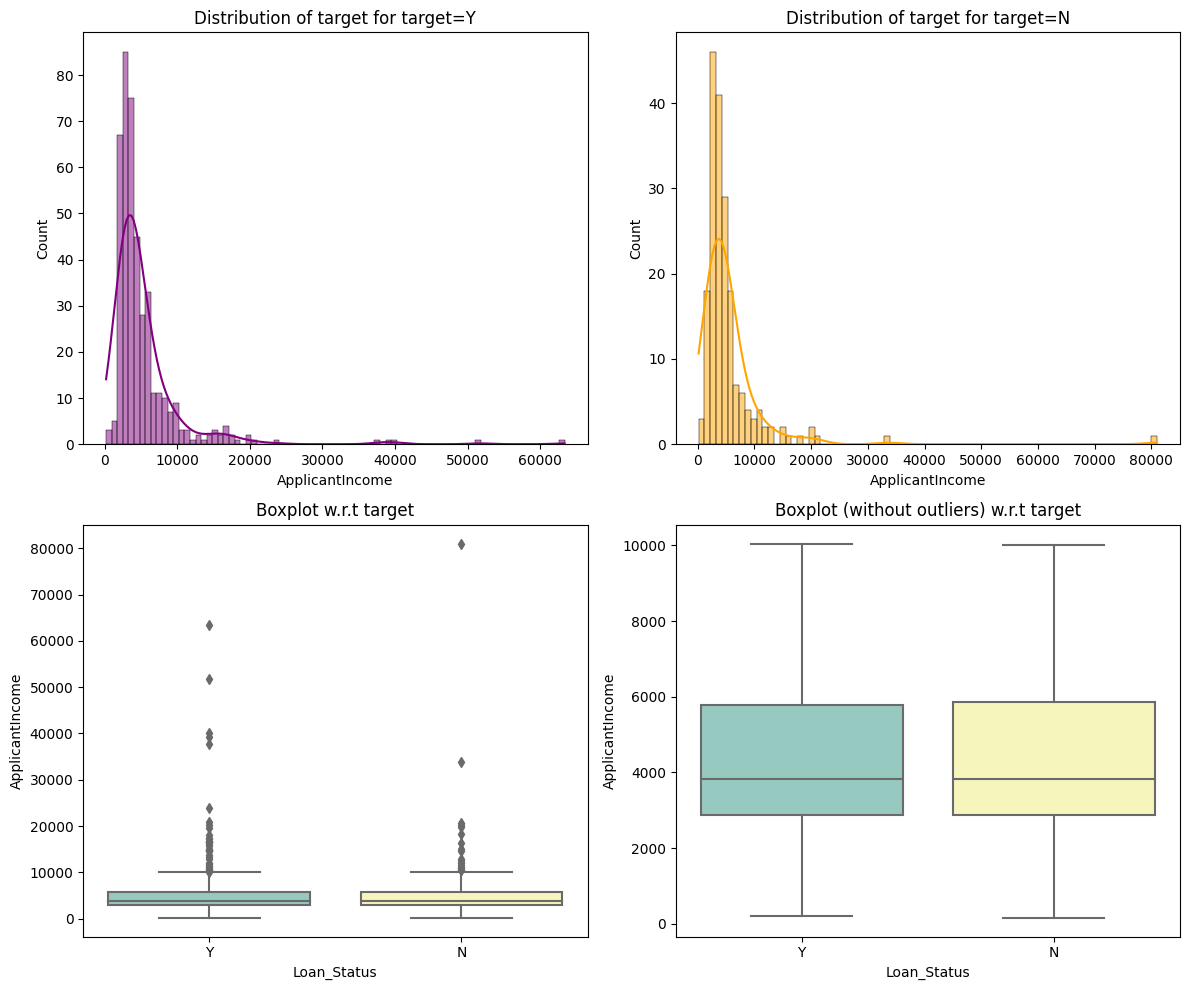

In [50]:
distribution_plot_wrt_target(data,"ApplicantIncome", "Loan_Status")

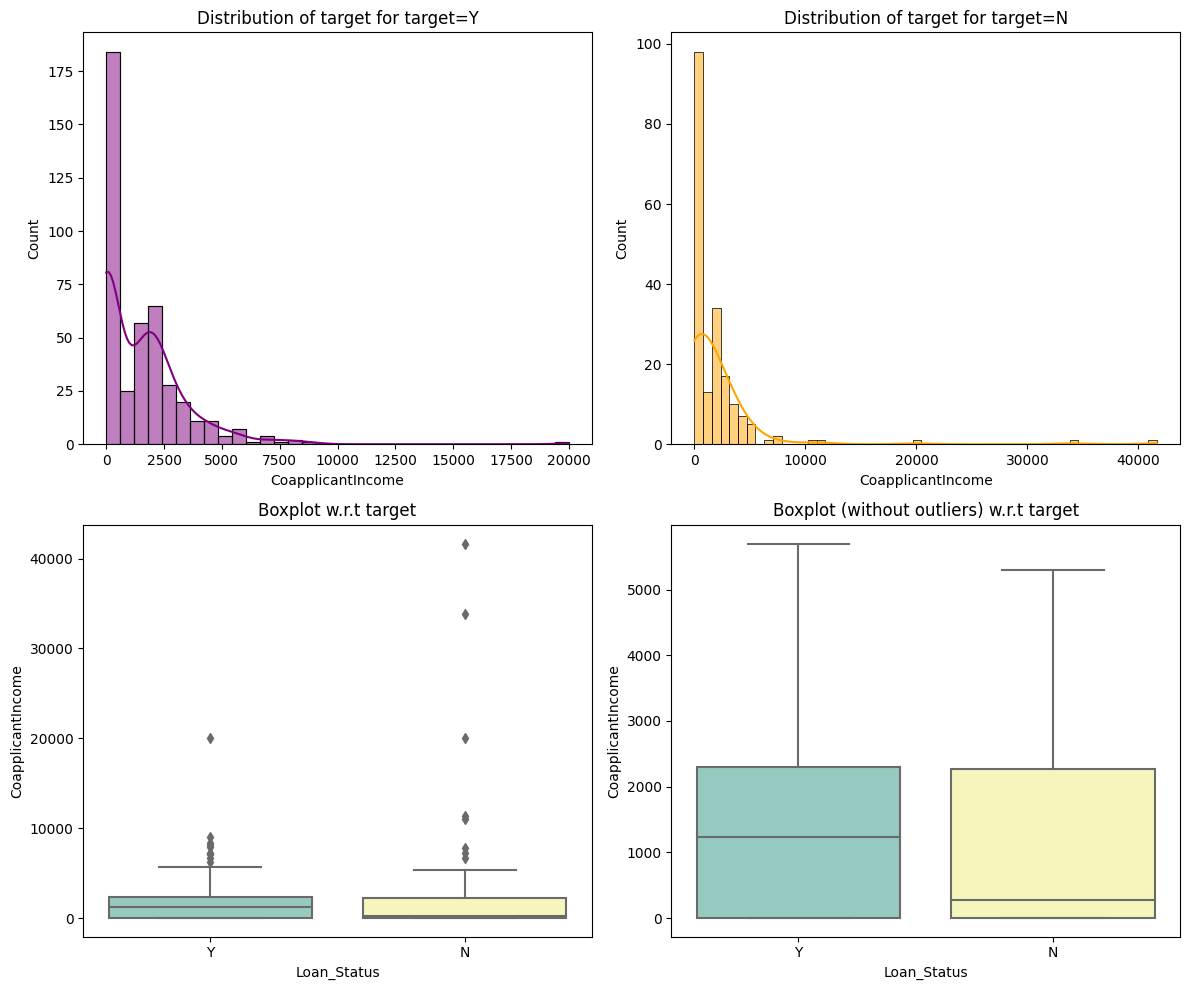

In [51]:
distribution_plot_wrt_target(data, "CoapplicantIncome", "Loan_Status")

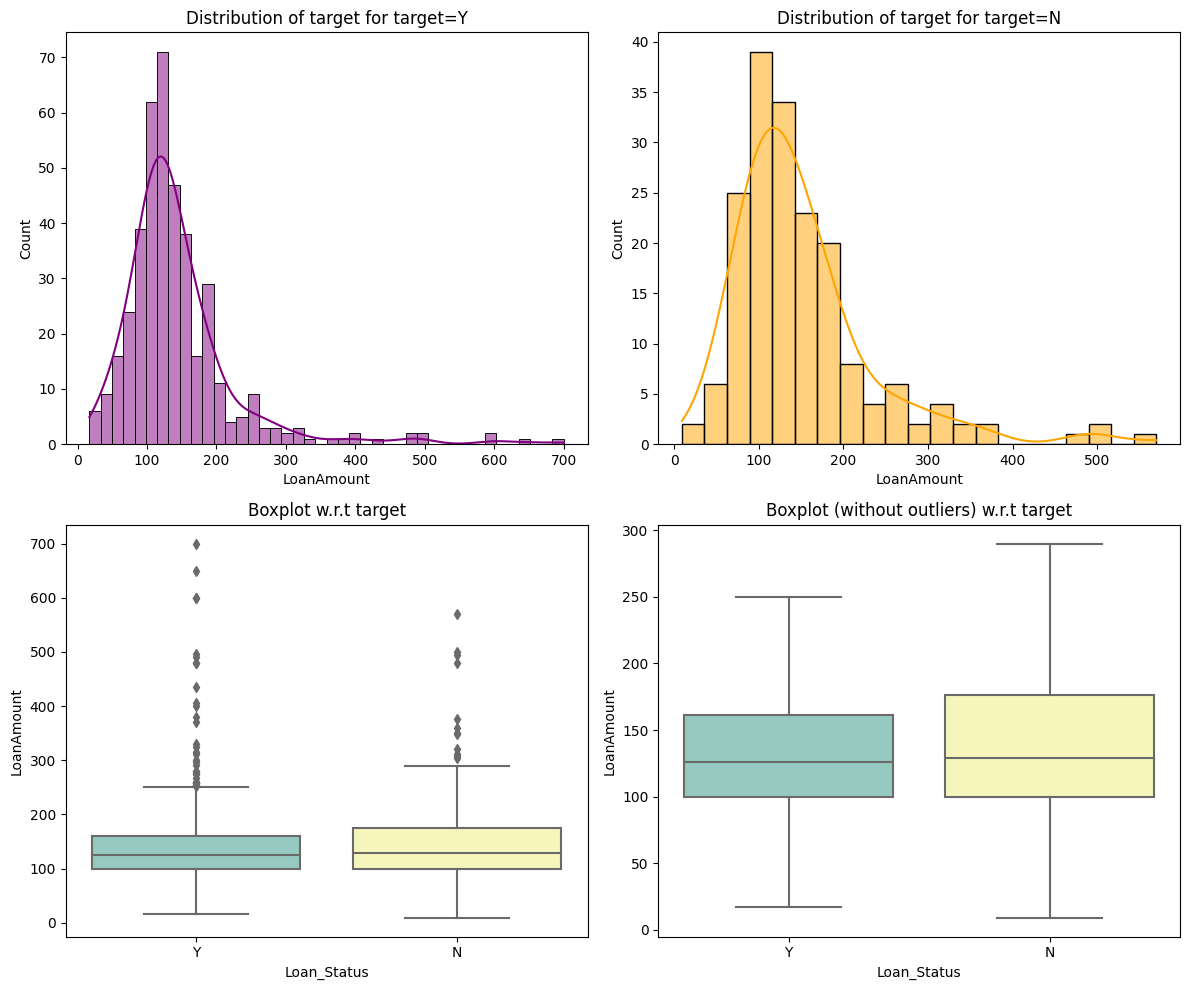

In [52]:
distribution_plot_wrt_target(data, "LoanAmount","Loan_Status")

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

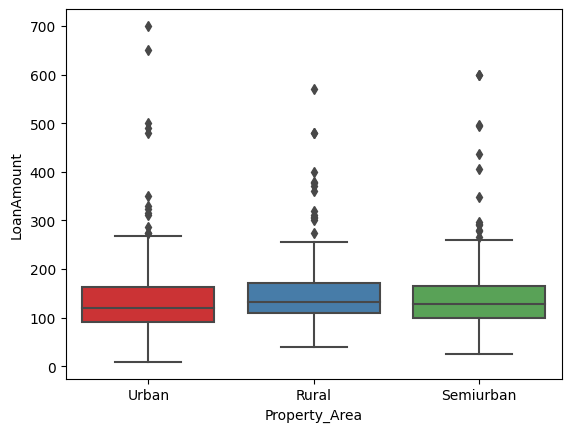

In [53]:
sns.boxplot(data=data, x="Property_Area", y="LoanAmount", palette="Set1")

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

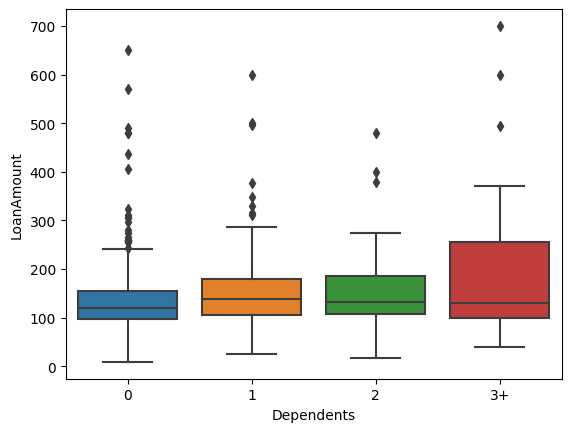

In [54]:
sns.boxplot(data=data, x="Dependents", y="LoanAmount")

##Data Preprocessing

In [55]:
data.drop(["Loan_ID"], axis=1, inplace=True)
data_test.drop(["Loan_ID"], axis=1, inplace=True)

In [56]:
data1 = data.copy()
test1 = data_test.copy()

In [57]:
data1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
def process(data1):

  data1 = data1.dropna()

  gender = {"Male": 1, "Female": 0}
  data1["Gender"] = data1["Gender"].map(gender)
  married = {"Yes": 1, "No": 0}
  data1["Married"] = data1["Married"].map(married)
  dependents = {"0": 0, "1": 1, "2": 2, "3+": 3}
  data1["Dependents"] = data1["Dependents"].map(dependents)
  education = {"Graduate": 1, "Not Graduate": 0}
  data1["Education"] = data1["Education"].map(education)
  self_employed = {"Yes": 1, "No": 0}
  data1["Self_Employed"] = data1["Self_Employed"].map(self_employed)
  #cols=['Property_Area']
  ohe=OneHotEncoder(sparse=False)
  transformed=ohe.fit_transform(data1[['Property_Area']])
  #adding transformed values to df
  data1[ohe.categories_[0]]=transformed
  data1=data1.drop('Property_Area',axis=1)
  data1.drop(["Loan_ID"], axis=1, inplace=True)

  return data1

In [59]:
df_train = process(df)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.000,128.000,360.000,1.000,N,1.000,0.000,0.000
2,1,1,0,1,1,3000,0.000,66.000,360.000,1.000,Y,0.000,0.000,1.000
3,1,1,0,0,0,2583,2358.000,120.000,360.000,1.000,Y,0.000,0.000,1.000
4,1,0,0,1,0,6000,0.000,141.000,360.000,1.000,Y,0.000,0.000,1.000
5,1,1,2,1,1,5417,4196.000,267.000,360.000,1.000,Y,0.000,0.000,1.000


In [60]:
X_test = process(df_test)
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,1,1,0,1,0,5720,0,110.000,360.000,1.000,0.000,0.000,1.000
1,1,1,1,1,0,3076,1500,126.000,360.000,1.000,0.000,0.000,1.000
2,1,1,2,1,0,5000,1800,208.000,360.000,1.000,0.000,0.000,1.000
4,1,0,0,0,0,3276,0,78.000,360.000,1.000,0.000,0.000,1.000
5,1,1,0,0,1,2165,3422,152.000,360.000,1.000,0.000,0.000,1.000


In [61]:
df_train["Loan_Status"] = df_train["Loan_Status"].map({"Y": 1, "N": 0})
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.000,128.000,360.000,1.000,0,1.000,0.000,0.000
2,1,1,0,1,1,3000,0.000,66.000,360.000,1.000,1,0.000,0.000,1.000
3,1,1,0,0,0,2583,2358.000,120.000,360.000,1.000,1,0.000,0.000,1.000
4,1,0,0,1,0,6000,0.000,141.000,360.000,1.000,1,0.000,0.000,1.000
5,1,1,2,1,1,5417,4196.000,267.000,360.000,1.000,1,0.000,0.000,1.000


In [62]:
y = df_train["Loan_Status"]
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [63]:
X = df_train.drop(["Loan_Status"], axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
1,1,1,1,1,0,4583,1508.000,128.000,360.000,1.000,1.000,0.000,0.000
2,1,1,0,1,1,3000,0.000,66.000,360.000,1.000,0.000,0.000,1.000
3,1,1,0,0,0,2583,2358.000,120.000,360.000,1.000,0.000,0.000,1.000
4,1,0,0,1,0,6000,0.000,141.000,360.000,1.000,0.000,0.000,1.000
5,1,1,2,1,1,5417,4196.000,267.000,360.000,1.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.000,71.000,360.000,1.000,1.000,0.000,0.000
610,1,1,3,1,0,4106,0.000,40.000,180.000,1.000,1.000,0.000,0.000
611,1,1,1,1,0,8072,240.000,253.000,360.000,1.000,0.000,0.000,1.000
612,1,1,2,1,0,7583,0.000,187.000,360.000,1.000,0.000,0.000,1.000


In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                  random_state=1, stratify=y)

In [65]:
print(X_train.shape)
print(X_val.shape)

(384, 13)
(96, 13)


In [66]:
scorer = metrics.make_scorer(metrics.recall_score)

###Random Forest

In [67]:
#building model 1 with random forest classifier and predict labels
model1=RandomForestClassifier(n_estimators=600,max_depth=10)
model1.fit(X_train,y_train)
pred_tr=model1.predict(X_train)
print(classification_report(y_train,pred_tr))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90       118
           1       0.92      1.00      0.96       266

    accuracy                           0.94       384
   macro avg       0.96      0.91      0.93       384
weighted avg       0.95      0.94      0.94       384



In [68]:
pred_ts = model1.predict(X_val)
print(classification_report(y_val, pred_ts))

              precision    recall  f1-score   support

           0       0.94      0.53      0.68        30
           1       0.82      0.98      0.90        66

    accuracy                           0.84        96
   macro avg       0.88      0.76      0.79        96
weighted avg       0.86      0.84      0.83        96



###XGBoost

In [69]:
model2 = XGBClassifier(random_state=1, eval_metric='logloss')
model2.fit(X_train, y_train)
XGB_pred = model2.predict(X_train)
print(classification_report(y_train, XGB_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       266

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [70]:
pred_ts = model2.predict(X_val)
print(classification_report(y_val, pred_ts))

              precision    recall  f1-score   support

           0       0.74      0.57      0.64        30
           1       0.82      0.91      0.86        66

    accuracy                           0.80        96
   macro avg       0.78      0.74      0.75        96
weighted avg       0.80      0.80      0.79        96



###ADABoost

In [71]:
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
pred_tr = model3.predict(X_train)
print(classification_report(y_train, pred_tr))

              precision    recall  f1-score   support

           0       0.85      0.58      0.69       118
           1       0.84      0.95      0.89       266

    accuracy                           0.84       384
   macro avg       0.85      0.77      0.79       384
weighted avg       0.84      0.84      0.83       384



In [72]:
pred_ts = model3.predict(X_val)
print(classification_report(y_val, pred_ts))

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        30
           1       0.80      0.97      0.88        66

    accuracy                           0.81        96
   macro avg       0.84      0.72      0.74        96
weighted avg       0.82      0.81      0.79        96



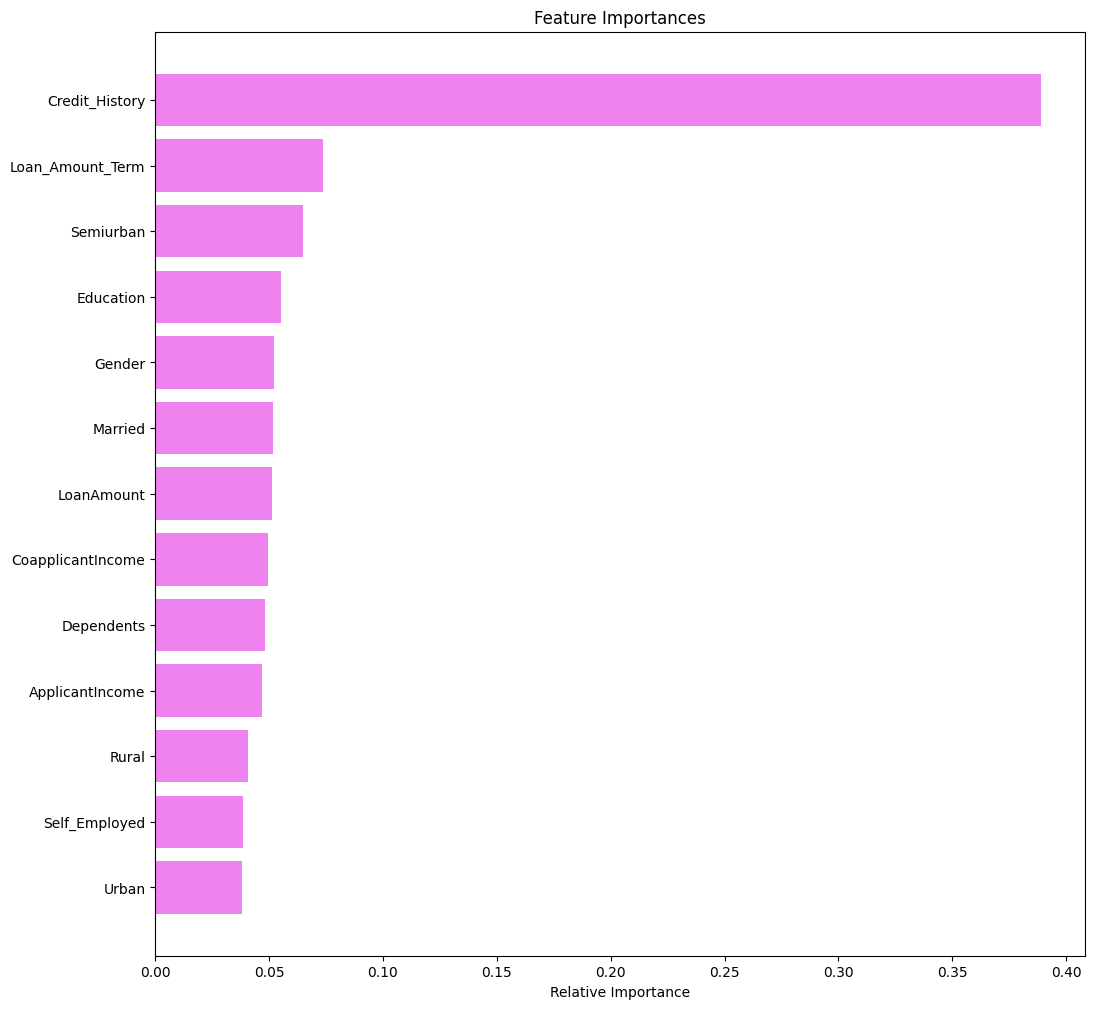

In [73]:
feature_names = X_train.columns
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

References: https://www.kaggle.com/code/natchimuthun/home-loan-approval-eda-analysis

In [74]:
pip install nbconvert

In [75]:
%%shell
!jupyter nbconvert --to html /StandardBank.ipynb

/bin/bash: line 1: !jupyter: command not found


CalledProcessError: ignored

In [ ]:
%%shell
jupyter nbconvert --to html ///content/StandardBank.ipynb